# 1.Introducción

En este taller trabajaremos con el Wine Dataset del repositorio de UCI, disponible en sklearn.

El objetivo es predecir la clase de vino a partir de variables químicas como la cantidad de alcohol, ácido málico, flavonoides, entre otros.

Preguntas:

¿Qué diferencia hay entre un problema de regresión y uno de clasificación?

¿Por qué un árbol de decisión es adecuado para clasificación?

# 2. Carga y exploración de datos

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el dataset
wine = load_wine()

# Convertir a DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

# Mostrar las primeras 15 filas del dataset
print("Primeras 15 filas del dataset:\n")
print(df.head(15))

# Muestra información general del dataset
print("\nInformación general del DataFrame:\n")
print(df.info())

# Genera una tabla con la descripción de cada campo y su significado
feature_desc = {
    "alcohol": "Contenido de alcohol",
    "malic_acid": "Ácido málico",
    "ash": "Ceniza",
    "alcalinity_of_ash": "Alcalinidad de la ceniza",
    "magnesium": "Magnesio (mg/L)",
    "total_phenols": "Fenoles totales",
    "flavanoids": "Flavonoides",
    "nonflavanoid_phenols": "Fenoles no flavonoides",
    "proanthocyanins": "Proantocianidinas",
    "color_intensity": "Intensidad de color",
    "hue": "Matiz (hue)",
    "od280/od315_of_diluted_wines": "OD280/OD315 de vinos diluidos",
    "proline": "Prolina"
}

desc_campos = pd.DataFrame({
    "campo": wine.feature_names,
    "descripcion": [feature_desc.get(f, "") for f in wine.feature_names]
}).reset_index(drop=True)

print("\nDescripción de cada campo:\n")
print(desc_campos)

# Revisar balance de acuerdo al número de clases
target_map = {i: name for i, name in enumerate(wine.target_names)}
df["target_name"] = df["target"].map(target_map)

conteo = df["target"].value_counts().sort_index()
porcentaje = (conteo / len(df) * 100).round(2)

balance = pd.DataFrame({
    "clase_num": conteo.index,
    "clase_nombre": [target_map[i] for i in conteo.index],
    "conteo": conteo.values,
    "porcentaje": porcentaje.values
})

print("\nBalance de clases (conteo y porcentaje):\n")
print(balance)

# Estadísticas descriptivas de variables
stats = df.drop(columns=["target", "target_name"]).describe().T
print("\nEstadísticas descriptivas de variables numéricas:\n")
print(stats)


Primeras 15 filas del dataset:

    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
3     14.37        1.95  2.50               16.8      113.0           3.85   
4     13.24        2.59  2.87               21.0      118.0           2.80   
5     14.20        1.76  2.45               15.2      112.0           3.27   
6     14.39        1.87  2.45               14.6       96.0           2.50   
7     14.06        2.15  2.61               17.6      121.0           2.60   
8     14.83        1.64  2.17               14.0       97.0           2.80   
9     13.86        1.35  2.27               16.0       98.0           2.98   
10    14.10        2.16  2.30               18.0      105.0           2.95   
11    14.12        1.48  2.32   

Preguntas:

¿Qué librerías se usan para el manejo de datos y visualización?
Matplotlib, Seaborn, panda

¿Qué librerías pertenecen a scikit-learn y para qué sirven?
Librerías de scikit-learn: datasets, model_selection, tree, metrics.

¿Están balanceadas las clases?
Las clases no están totalmente balanceadas.

¿Por qué eso es importante en clasificación?
Es importante porque el modelo puede sesgarse hacia las clases con más ejemplos.



# 3. Visualización de datos

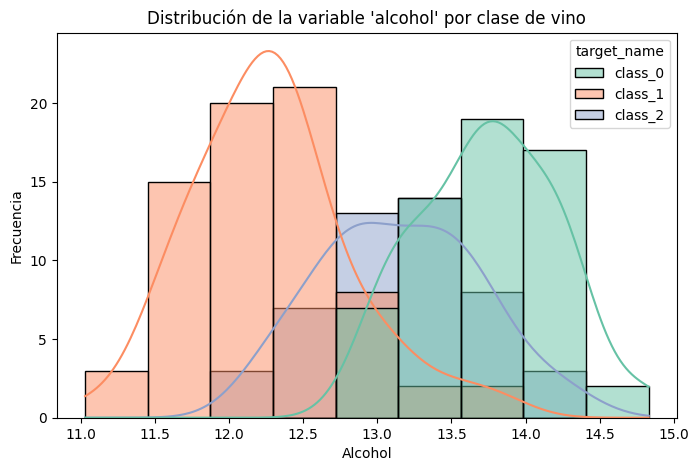

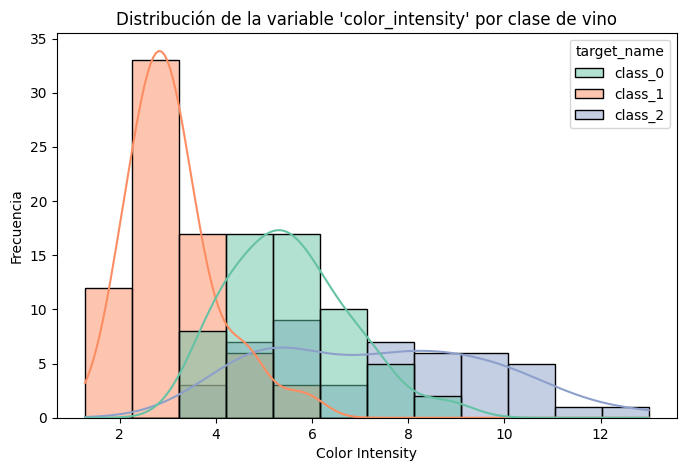

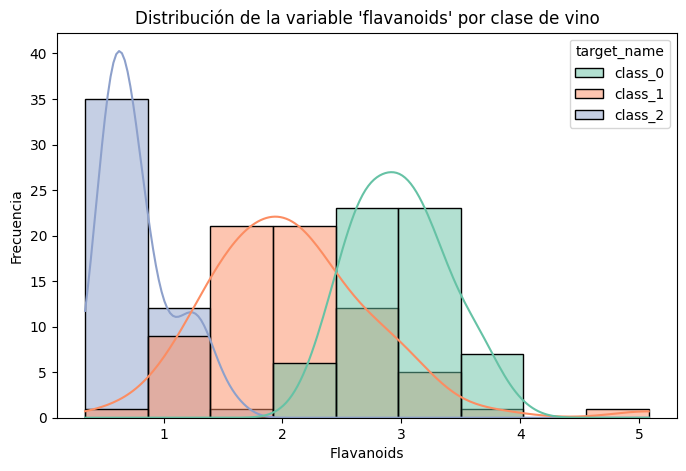

In [ ]:
# Visualizar distribuciones de algunas variables (por ejemplo, alcohol)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="alcohol", hue="target_name", kde=True, palette="Set2")
plt.title("Distribución de la variable 'alcohol' por clase de vino")
plt.xlabel("Alcohol")
plt.ylabel("Frecuencia")
plt.show()

# Puedes repetir el mismo tipo de gráfico para otras variables si lo deseas
# Ejemplo con 'color_intensity'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="color_intensity", hue="target_name", kde=True, palette="Set2")
plt.title("Distribución de la variable 'color_intensity' por clase de vino")
plt.xlabel("Color Intensity")
plt.ylabel("Frecuencia")
plt.show()

# Ejemplo con 'flavanoids'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="flavanoids", hue="target_name", kde=True, palette="Set2")
plt.title("Distribución de la variable 'flavanoids' por clase de vino")
plt.xlabel("Flavanoids")
plt.ylabel("Frecuencia")
plt.show()


¿Qué correlación existe entre la variable x y hue?

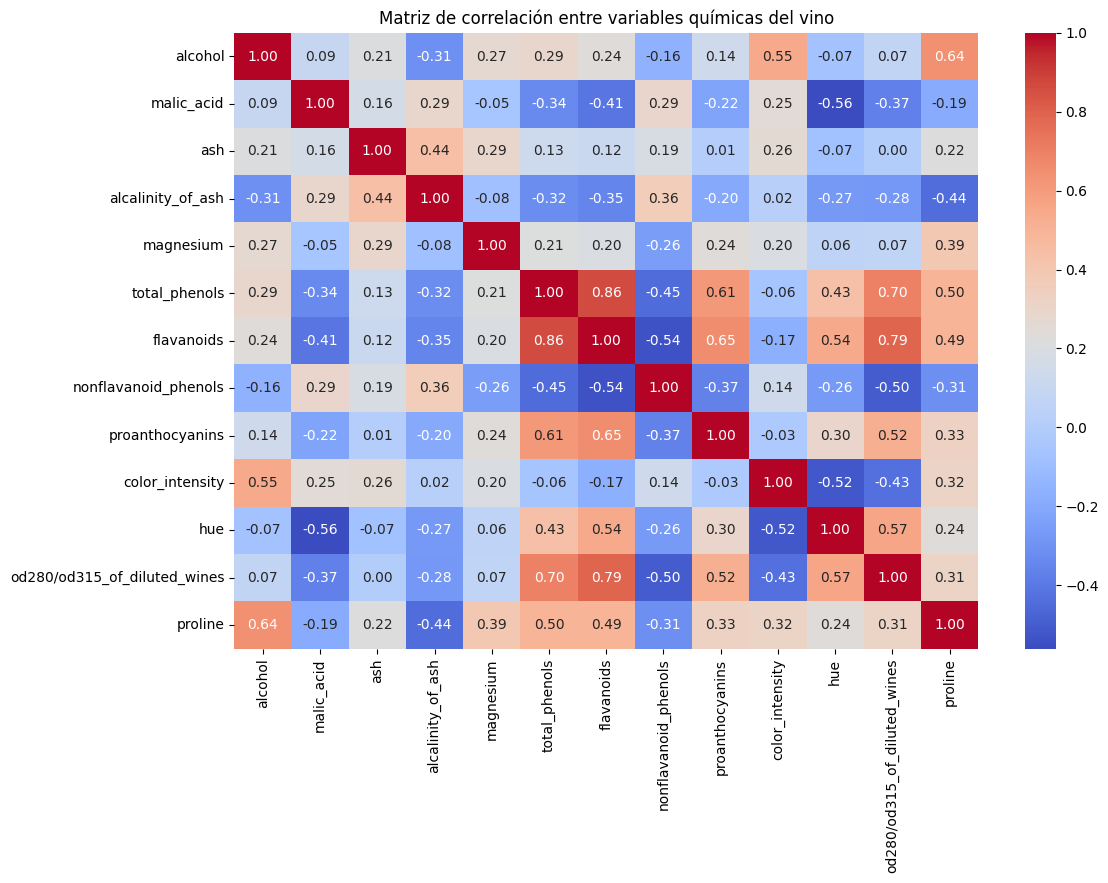

In [ ]:
# Visualizar matriz de correlación de variables
corr = df.drop(columns=["target", "target_name"]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Matriz de correlación entre variables químicas del vino")
plt.show()


¿Qué variables parecen más útiles para diferenciar clases?



#4. Segmentación 70% Entrenamiento, 15% Validación, 15% Prueba

In [ ]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["target", "target_name"])  # quitamos las columnas objetivo
y = df["target"]

# 70% entrenamiento, 30% temporal (que luego dividiremos en validación y prueba)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 15% validación, 15% prueba (dividimos el 30% restante en dos mitades iguales)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Mostrar cuántas filas tiene cada conjunto
print("Tamaño de cada conjunto:")
print(f"Entrenamiento: {X_train.shape[0]} filas")
print(f"Validación:    {X_val.shape[0]} filas")
print(f"Prueba:        {X_test.shape[0]} filas")



Tamaño de cada conjunto:
Entrenamiento: 124 filas
Validación:    27 filas
Prueba:        27 filas


¿Qué rol juega cada conjunto (train, validation, test)?
Train: se usa para entrenar el modelo.
Validation: se usa para ajustar y mejorar el modelo.
Test: se usa para evaluar el rendimiento final.

¿Qué implicaciones tiene evaluar primero en prueba y después en validación?
Evaluar primero en prueba puede sesgar los resultados, porque el modelo se ajustaría indirectamente al conjunto de prueba y perdería objetividad al medir su desempeño real.


# 5. Entrenamiento del modelo

Accuracy del modelo en el conjunto de prueba: 1.000


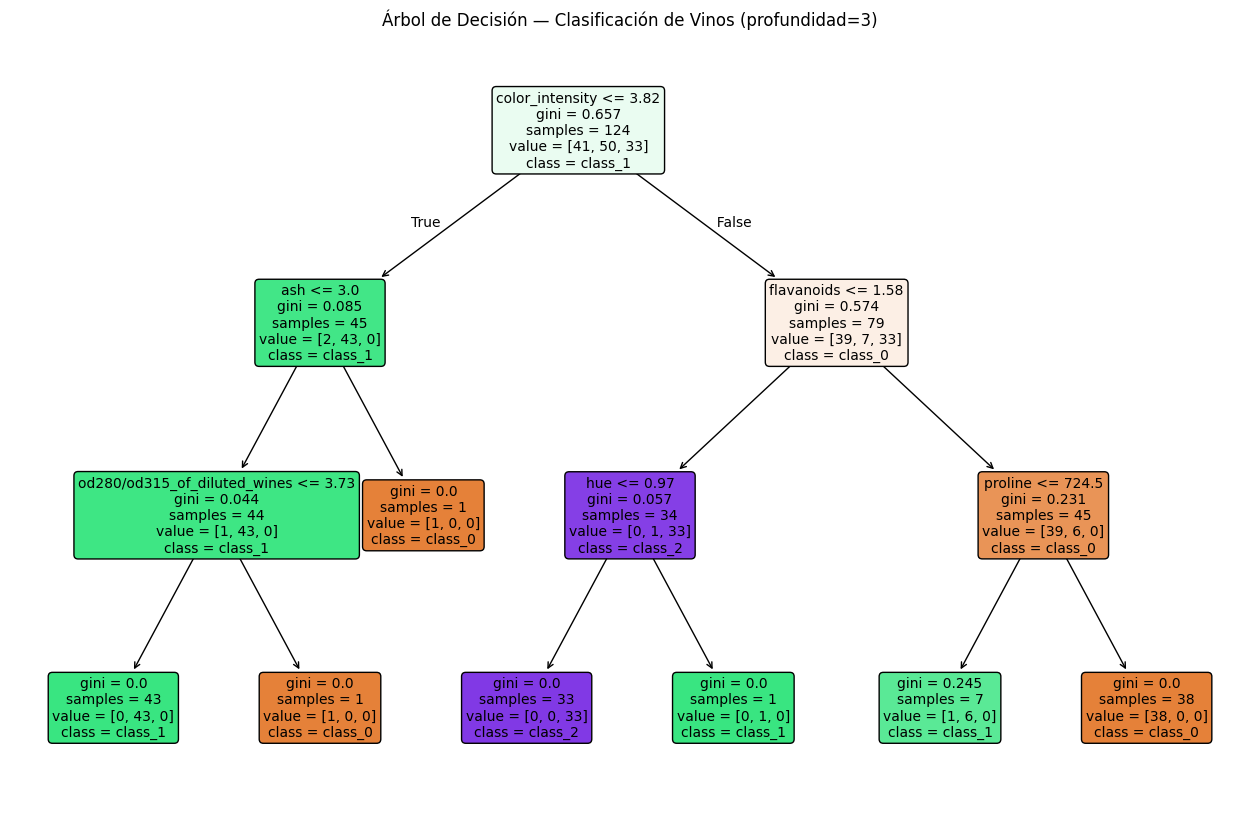

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Calcular Accuracy (porcentaje de aciertos)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy del modelo en el conjunto de prueba: {acc:.3f}")

# Visualizar modelo entrenado
plt.figure(figsize=(16, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=wine.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión — Clasificación de Vinos (profundidad=3)")
plt.show()


\¿Qué significa el parámetro criterion="gini"?
criterion="gini" indica que el árbol usa el índice de Gini para medir la pureza de los nodos.

¿Qué pasaría si realizamos cambios al límite de max_depth?
Cambiar max_depth ajusta la complejidad: valores altos pueden causar sobreajuste y valores bajos pueden generar un modelo poco preciso.

¿Qué variable aparece en la raíz del árbol?
En la raíz suele aparecer la variable más importante (por ejemplo, flavanoids o color_intensity).

¿Por qué crees que esa variable fue elegida?
Fue elegida porque es la que mejor separa las clases desde el inicio.

¿Cómo podrías interpretar las reglas del árbol?
Las reglas del árbol se interpretan como condiciones lógicas que dividen los datos según los valores de las variables hasta llegar a una clase final.



#6. Evaluación en validación

Accuracy del modelo en el conjunto de validación: 0.963


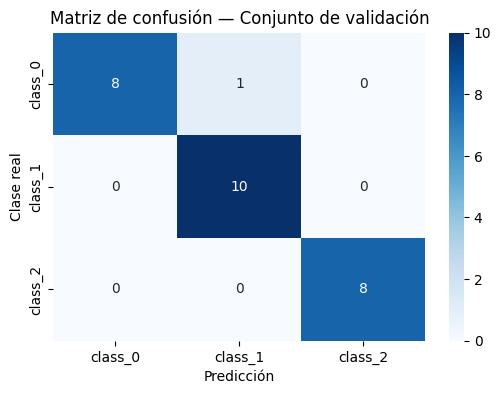

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Predicciones sobre el conjunto de validación
y_val_pred = model.predict(X_val)

# Accuracy: porcentaje total de aciertos
acc_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy del modelo en el conjunto de validación: {acc_val:.3f}")

# Visualizar matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=wine.target_names,
    yticklabels=wine.target_names
)
plt.xlabel("Predicción")
plt.ylabel("Clase real")
plt.title("Matriz de confusión — Conjunto de validación")
plt.show()



¿Qué relación tiene la metrica de accuracy en la fase de entrenamiento y validación con el riesgo de overfitting?
Si el accuracy en entrenamiento es mucho mayor que en validación, hay sobreajuste (overfitting), porque el modelo aprende demasiado los datos de entrenamiento y generaliza mal.

¿Cómo interpreta los resultados en la fase de validación en relación con la matriz de confusión?
En validación, la matriz de confusión muestra en qué clases el modelo acierta o falla; si hay muchos errores fuera de la diagonal, indica confusiones entre clases y menor capacidad de generalización.

#7. Evaluación en prueba

Accuracy del modelo en el conjunto de prueba: 1.000


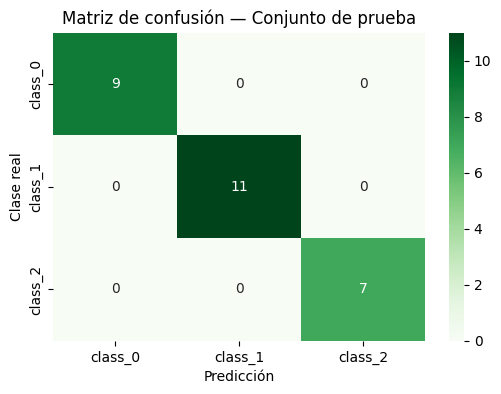

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones sobre el conjunto de prueba
y_test_pred = model.predict(X_test)

# Accuracy: porcentaje total de aciertos
acc_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy del modelo en el conjunto de prueba: {acc_test:.3f}")

# Visualizar matriz de confusión
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_test,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=wine.target_names,
    yticklabels=wine.target_names
)
plt.xlabel("Predicción")
plt.ylabel("Clase real")
plt.title("Matriz de confusión — Conjunto de prueba")
plt.show()



¿Qué información adicional da la matriz de confusión frente al accuracy?
La matriz de confusión muestra los aciertos y errores por clase, revelando en qué clases el modelo se equivoca, mientras que el accuracy solo da un promedio general.

¿Qué se puede concluir del modelo en esta sección?
Se puede concluir que el modelo clasifica bien los vinos, aunque puede confundir algunas clases según su similitud química.

#8. Reto

Realiza mejoras para aumentar la metrica de accuracy, genera los cambios que crea coveniente.